# Analysis of Pokemon Data

In this notebook for portfolio 4, we are going to discover the Pokemon world. In the Pokemon series game, players can go around different regions and catch many Pokemon. We want to provide them with some tools to do that, particularly, if we can classify between different type of Pokemon.

We first start by looking at the [Pokemon dataset from Kagle](https://www.kaggle.com/datasets/abcsds/pokemon). 
Then we will try to build a model to predict one pokemon's attribute depends on the pokemon other attributes. 
Finally, we will build another model to decide if it Legendary or not based on their stats.

### Description of Fields

* #: ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round

## Data Preprocessing

In [501]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme()


In [502]:
# load the dataset and display
pokemon = pd.read_csv('files/Pokemon.csv')
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [503]:
# info of each column
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Remove Null values

In [504]:
# check null values
pokemon.isnull().sum()


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Comment:** As the data description suggested, some Pokemon may no have a second type. Therefore, Type 2 has 386 null values. For the sake of simplicity, in the next step,we will remove Type 2 from the dataset hence consider a Pokemon only have 1 main Type.

We will also rename **Type 1** column to only **Type**.

In [505]:
# drop Type2 column and rename Type1 column
pokemon.drop(['Type 2'], axis=1, inplace=True)
pokemon.rename(columns={'Type 1': 'Type'}, inplace=True)
pokemon.columns


Index(['#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Encode Categorical Data

It can be reffered from the Description of Fields that **Type** and **Legendary** are two categorical columns. In this analysis, we will encode these columns into Ordinal values using **OrdinalEncoder** from sklearn.

#### Encode Type column

**Comment:** Pokemon fans have always familiar with a color palette of different Types. We can inffer from [Bullbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) to create the custom color pallete for this analysis.

In [506]:
# custom color palte for pokemon types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                    '#705848',  # Dark
                    '#B8B8D0',  # Steel
                    '#A890F0',  # Flying
                    ]


Text(0.5, 1.0, 'Pokemon count for each Type')

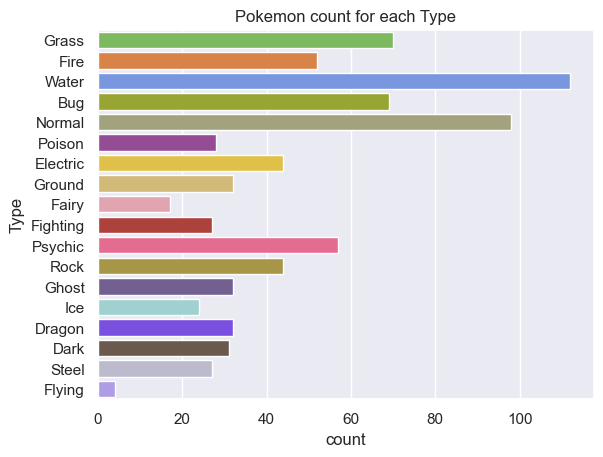

In [507]:
# plot number of pokemon for each Type
sns.countplot(data=pokemon, y=pokemon['Type'], label='Count',
              palette=pkmn_type_colors, ).set_title('Pokemon count for each Type')


In [508]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder()

# encode type
pokemon['type_code'] = ord_enc.fit_transform(pokemon[['Type']])
pokemon[['Type', 'type_code']].tail(10)


,Type,type_code
790,Flying,7.0
791,Flying,7.0
792,Fairy,4.0
793,Dark,1.0
794,Dragon,2.0
795,Rock,15.0
796,Rock,15.0
797,Psychic,14.0
798,Psychic,14.0
799,Fire,6.0


#### Encode Legendary Column

Text(0.5, 1.0, 'Pokemon count if Legendary')

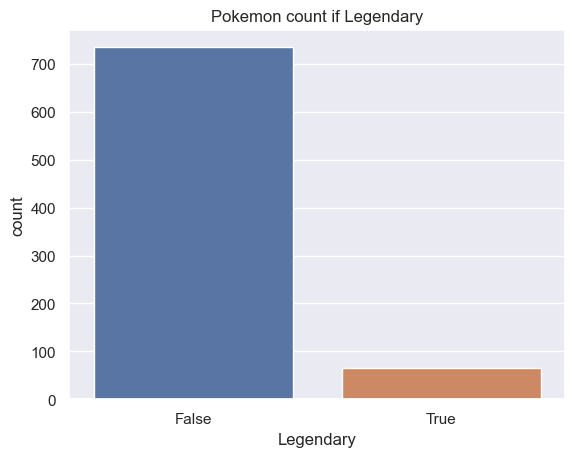

In [509]:
# plot number of pokemon by Legendary
sns.countplot(x=pokemon['Legendary'], label='Count').set_title(
    'Pokemon count if Legendary')


In [510]:
# encode type
pokemon['legendary'] = ord_enc.fit_transform(pokemon[['Legendary']])
pokemon[['Legendary', 'legendary']].tail(5)


,Legendary,legendary
795,True,1.0
796,True,1.0
797,True,1.0
798,True,1.0
799,True,1.0


**Comment:** Now our data has 2 more columns: **type_code and legendary**.

In [511]:
pokemon.head()


,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type_code,legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,9.0,0.0
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,9.0,0.0
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,9.0,0.0
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,9.0,0.0
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,6.0,0.0


## Data Exploration

In [512]:
# descriptive statistic
pokemon.describe()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,type_code,legendary
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,9.467500,0.08125
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,5.580356,0.27339
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.000000,0.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,5.000000,0.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,10.000000,0.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,14.000000,0.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,17.000000,1.00000


Let's see a box plot to compare between pokemon's combat stats. We can remove the total since it the combination of all other stats.

/Users/dannguyen/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Boxplot of Combat stats')

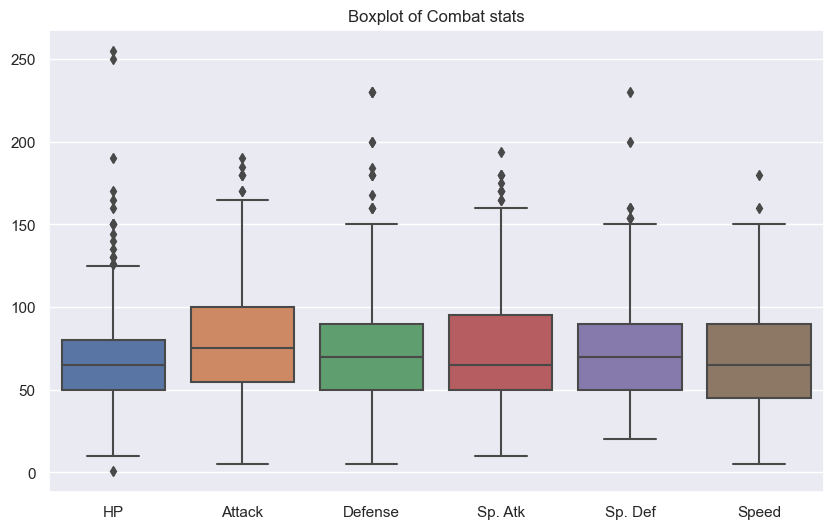

In [513]:
stats_df = pokemon.drop(
    ['#', 'Total', 'Generation', 'Legendary', 'type_code', 'legendary'], axis=1)
plt.figure(figsize=(10, 6))  # Set plot dimensions
sns.boxplot(data=stats_df).set_title('Boxplot of Combat stats')


The stats seem to be evenly distributed. Let's take another look at the number of pokemon for different Generation.

Text(0.5, 1.0, 'Count of Pokemon by each Generation')

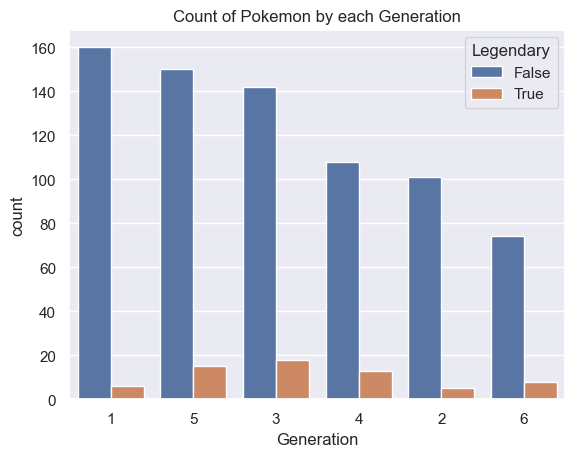

In [514]:
sns.countplot(data=pokemon, x=pokemon.Generation, hue='Legendary',
              order=pokemon['Generation'].value_counts().index)
plt.title('Count of Pokemon by each Generation')


We can explore the data more by looking at the mean stats compare by each generations.

/var/folders/wn/qqns388d55l547dg89zgbmfw0000gn/T/ipykernel_36793/368042633.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pkm_stats_by_gen = pokemon.groupby('Generation').mean(


Text(0.5, 1.0, 'Mean Stats compare by each Generation')

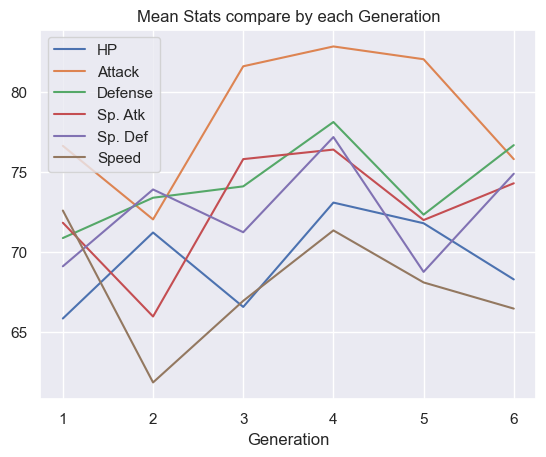

In [515]:
pkm_stats_by_gen = pokemon.groupby('Generation').mean(
)[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pkm_stats_by_gen.plot.line()
plt.title('Mean Stats compare by each Generation')


### Correlation

Now lets take a look at the correlation between different columns, to see if we can determine any relationship between any attribute.

In [516]:
# we only use numeric column with corr
pokemon_num = pokemon.drop(['#', 'Legendary', 'Type', 'Name', 'Total'], axis=1)

# correlation table
corr = pokemon_num.corr()
corr


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,type_code,legendary
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.094230,0.273620
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,-0.037525,0.345408
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.103439,0.246377
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,-0.006694,0.448907
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.018911,0.363937
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,-0.066471,0.326715
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,-0.101129,0.079794
type_code,0.094230,-0.037525,0.103439,-0.006694,0.018911,-0.066471,-0.101129,1.000000,-0.010162
legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,-0.010162,1.000000


<AxesSubplot: >

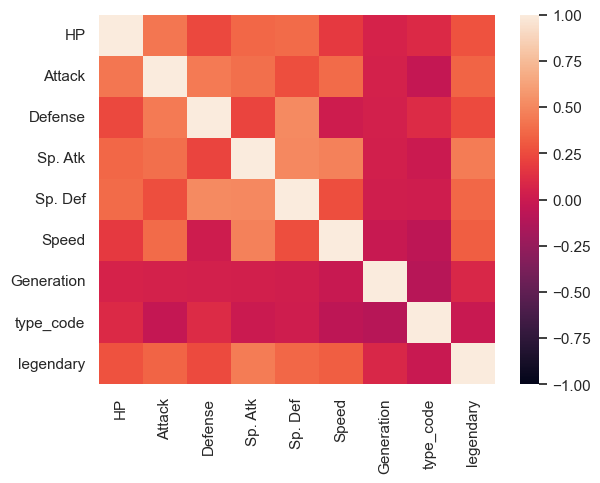

In [517]:
# heat maap
sns.heatmap(corr, vmin=-1)


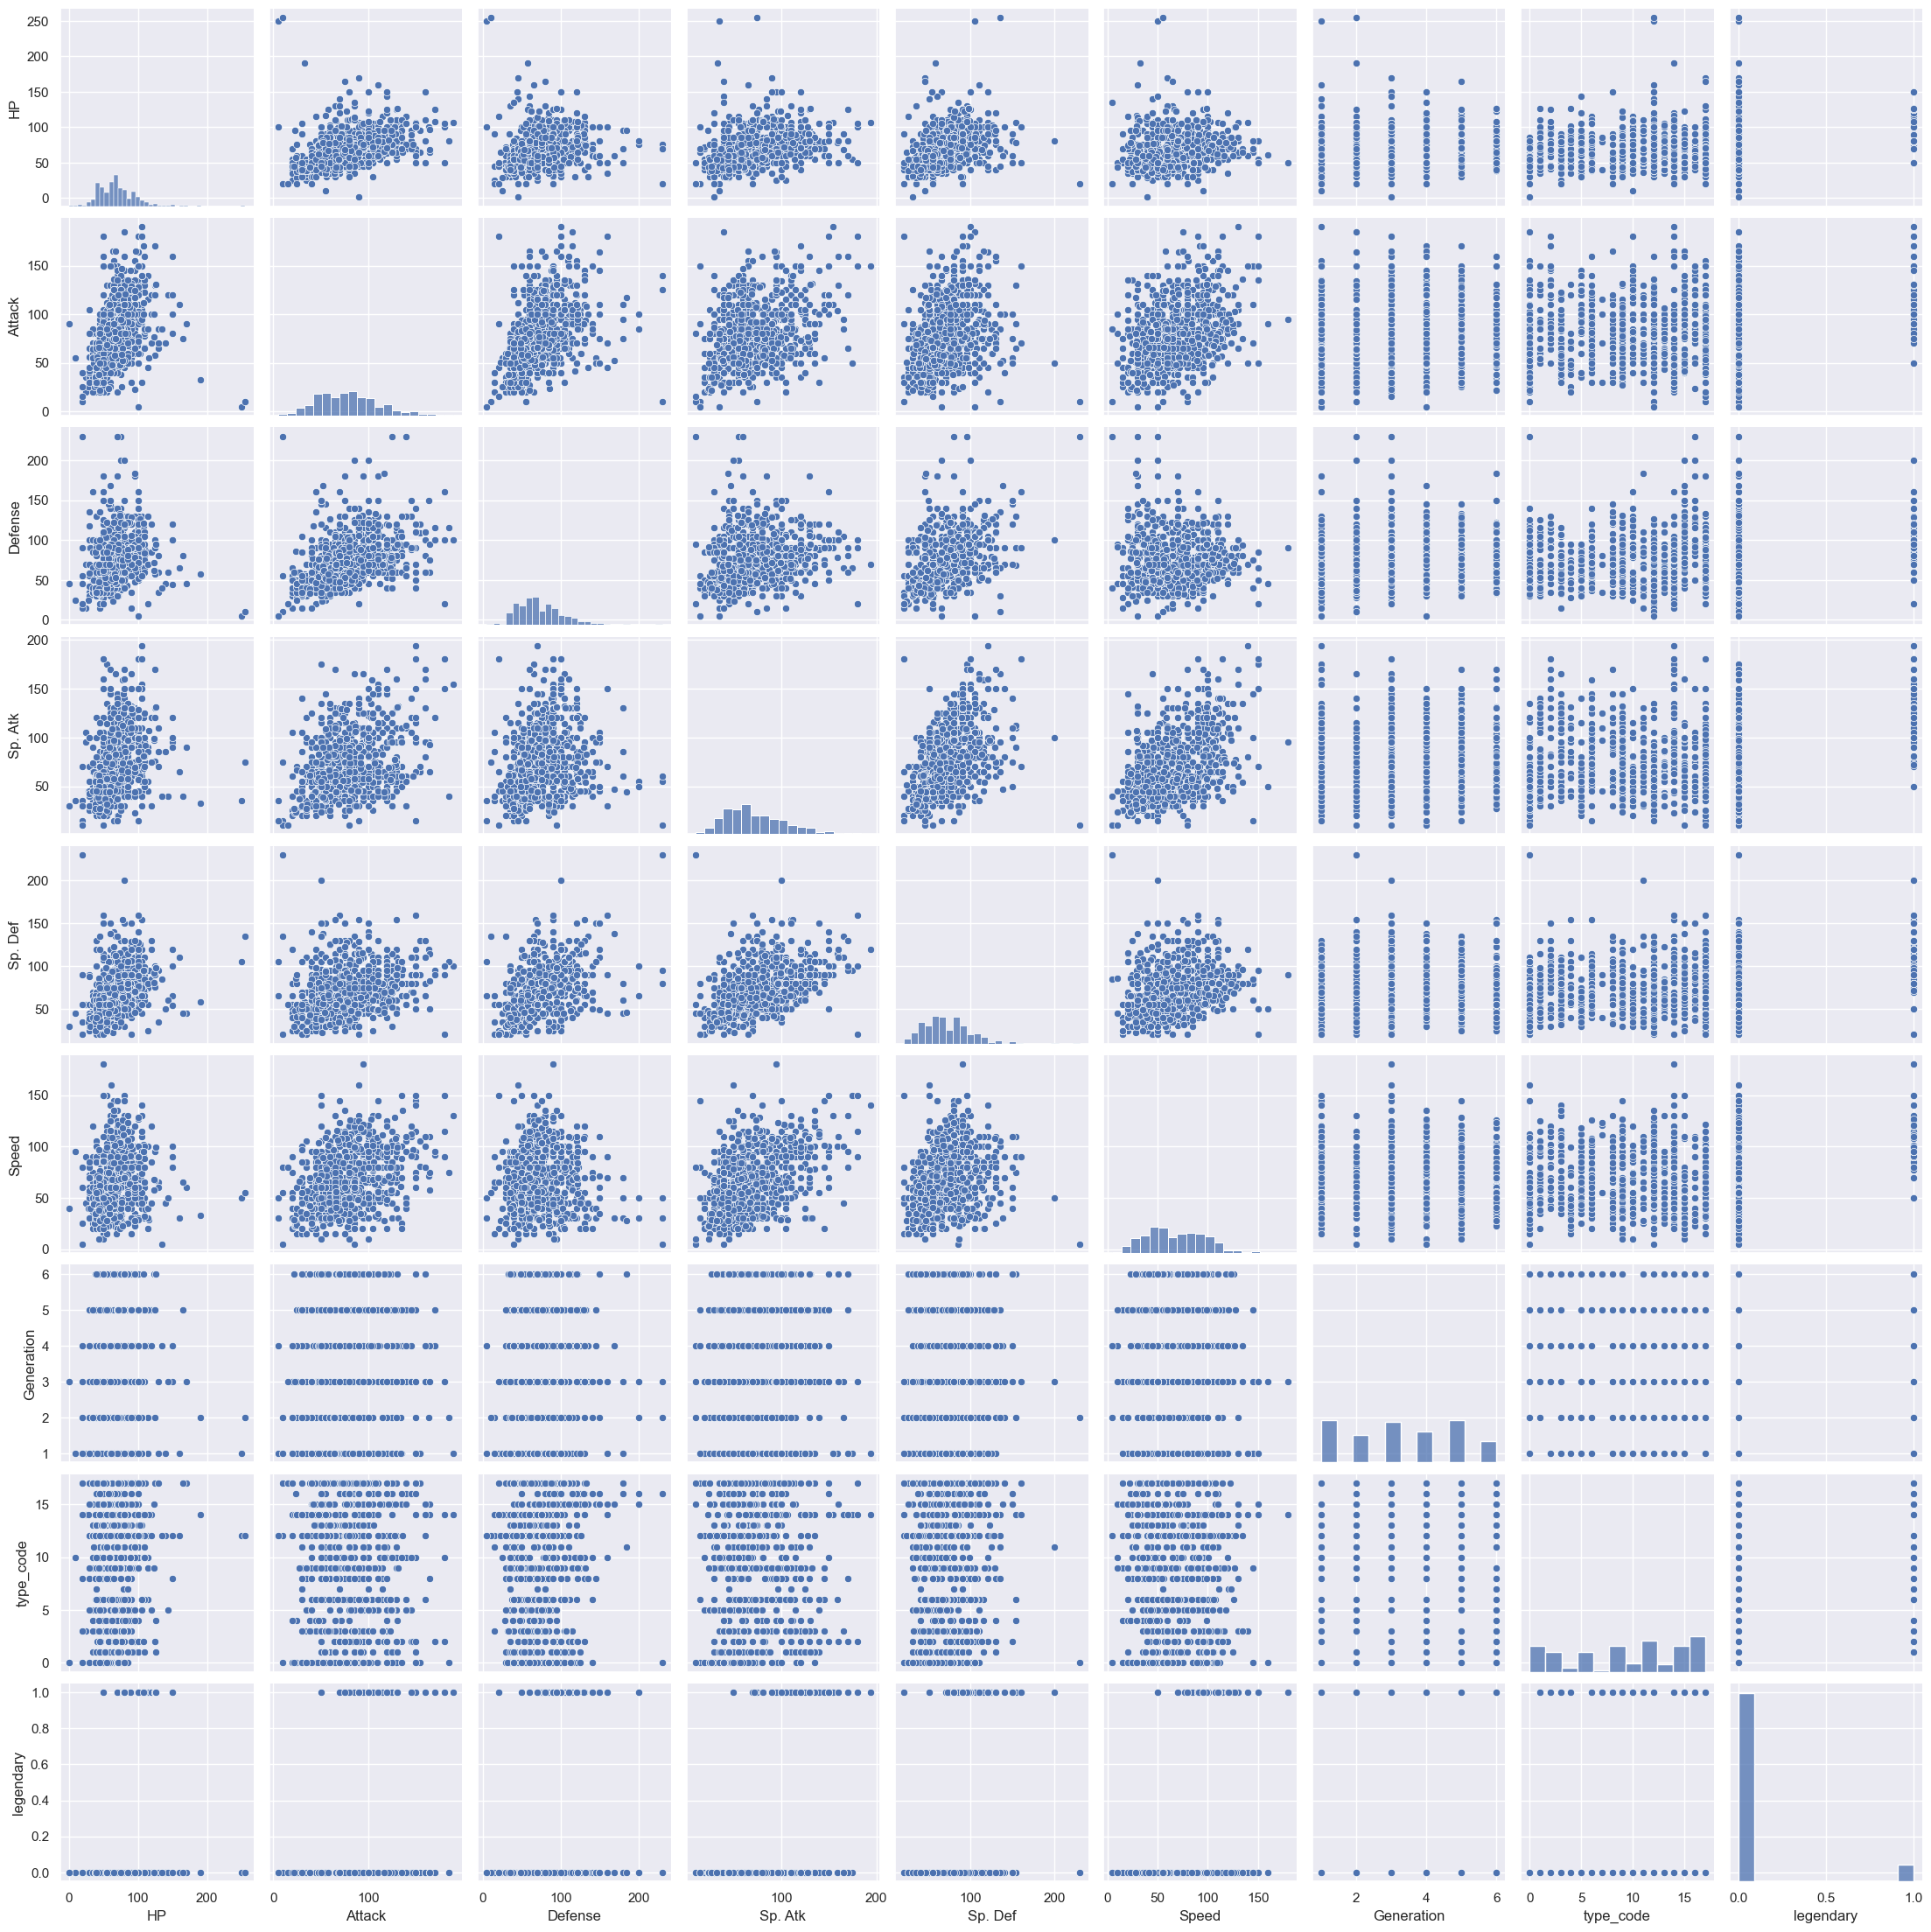

In [518]:
sns.pairplot(pokemon_num) 


## Predict Pokemon Defense by other Combat Stats

So far, we have explored the data and looked at the correlation. Now, we can use these data to build a Linear Regression Model, to predict a Pokemon Defense based on that Pokemon other combat stats.

### Selecting Feature to Train

In [519]:
# compare absolute value of correlation to find most and least correlated feature with defense
defense_correlated = pokemon_num.corr().Defense.abs().sort_values(ascending=False).reset_index().drop(index=0).rename({'index': 'feature', 'Defense': 'correlation'}, axis=1)
defense_correlated


,feature,correlation
1,Sp. Def,0.510747
2,Attack,0.438687
3,legendary,0.246377
4,HP,0.239622
5,Sp. Atk,0.223549
6,type_code,0.103439
7,Generation,0.042419
8,Speed,0.015227


As can see from the table above, as well as the pairplot from previous section, Sp. Def can be a good candidate to provide as the input for our Linear Regression Model.

### Training and Testing Data

In [520]:
from sklearn.model_selection import train_test_split

# Split data into training(75%) and testing data (25%) and use random_state=142
train, test = train_test_split(pokemon_num, random_state=142)
print('Shape of training and testing set:', train.shape, test.shape)

input_features = ['Sp. Def']
target_feature = 'Defense'

X_train = train[input_features]
y_train = train[target_feature]
X_test = test[input_features]
y_test = test[target_feature]


Shape of training and testing set: (600, 9) (200, 9)


### Build Linear Regresion Model

In [521]:
# Build Logistic Regression model
from sklearn.linear_model import LinearRegression, LogisticRegression


ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

print('coef=', ln_model.coef_, 'intercept=',
      ln_model.intercept_)


coef= [0.60570054] intercept= 31.10965582828318


We could visualize the Linear Regression line created with our model as below.

Text(0.5, 0.98, 'Regression model fitting Pokemon Stats')

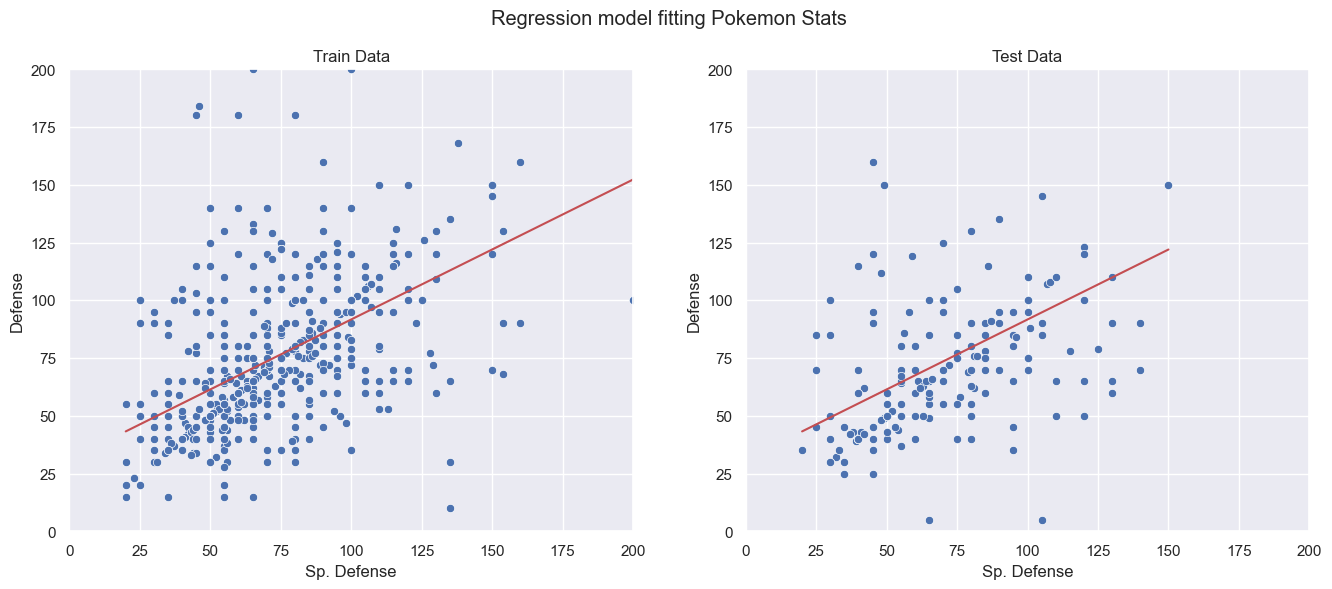

In [522]:
# predidct train value
train_predicted = ln_model.predict(X_train)
test_predicted = ln_model.predict(X_test)

## scatterplot for both set separately
scatter_fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
# scatter plot from training data
sns.scatterplot(x=X_train['Sp. Def'], y=y_train)
sns.lineplot(x=X_train['Sp. Def'], y=train_predicted, c='r')
plt.ylabel('Defense')
plt.xlabel('Sp. Defense')
plt.ylim(0, 200)
plt.xlim(0, 200)
plt.title('Train Data')

plt.subplot(1, 2, 2)
# scatter plot from training data
sns.scatterplot(x=X_test['Sp. Def'], y=y_test)
sns.lineplot(x=X_test['Sp. Def'], y=test_predicted, c='r')
plt.xlabel('Sp. Defense')
plt.ylim(0, 200)
plt.xlim(0, 200)
plt.title('Test Data')

scatter_fig.suptitle('Regression model fitting Pokemon Stats')



### Evaluation

We use 3 metrics: Mean Squared Error, Root Mean Squared Error and $R^2$ to evaluate our model.

In [523]:
# Evaluate the performance of your trained model
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error

def evaluate_model(model, X, y):
    predicted = model.predict(X)
    mse = mean_squared_error(y, predicted)
    r2 = r2_score(y, predicted)
    rmse = mean_squared_error(y, predicted, squared=False)
    print("Root MSE", rmse)
    print("MSE:", mse)
    print("R Squared:", r2)
    return [mse, r2, rmse]

In [524]:
# Evaluate model
evaluation_report = []
print('Evaluate on train data')
score = evaluate_model(ln_model, X_train, y_train)
score.insert(0,'1-LR-train')
evaluation_report.append(score)

print()
print('Evaluate on test data')
score = evaluate_model(ln_model, X_test, y_test)
score.insert(0, '1-LR-test')
evaluation_report.append(score)

Evaluate on train data
Root MSE 27.607961767053887
MSE: 762.1995529311091
R Squared: 0.27426332056771296

Evaluate on test data
Root MSE 24.30882383899484
MSE: 590.9189164352838
R Squared: 0.1849646073896698


**Comment:**: The MSE of the model is quite high, it shows that our model does not give very good predictions. Furthermore, $R^2$ score of the model is also quite low, which indicates the models does not exlain the variation in data very well. We might improve this performance by adding some other features as our input.

### Feature Selection

Our initial model used one feature but it is possible that a better model can be built by adding some feature in.

The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features. We will use RFE to select features for a model with 3, 4 and 5 features.

In [525]:
from sklearn.feature_selection import RFE

# list possible input features
X_train = train[['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed']]
X_test = test[['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed']]

Text(0.5, 0.98, 'Feature Selection Evaluation with RFE')

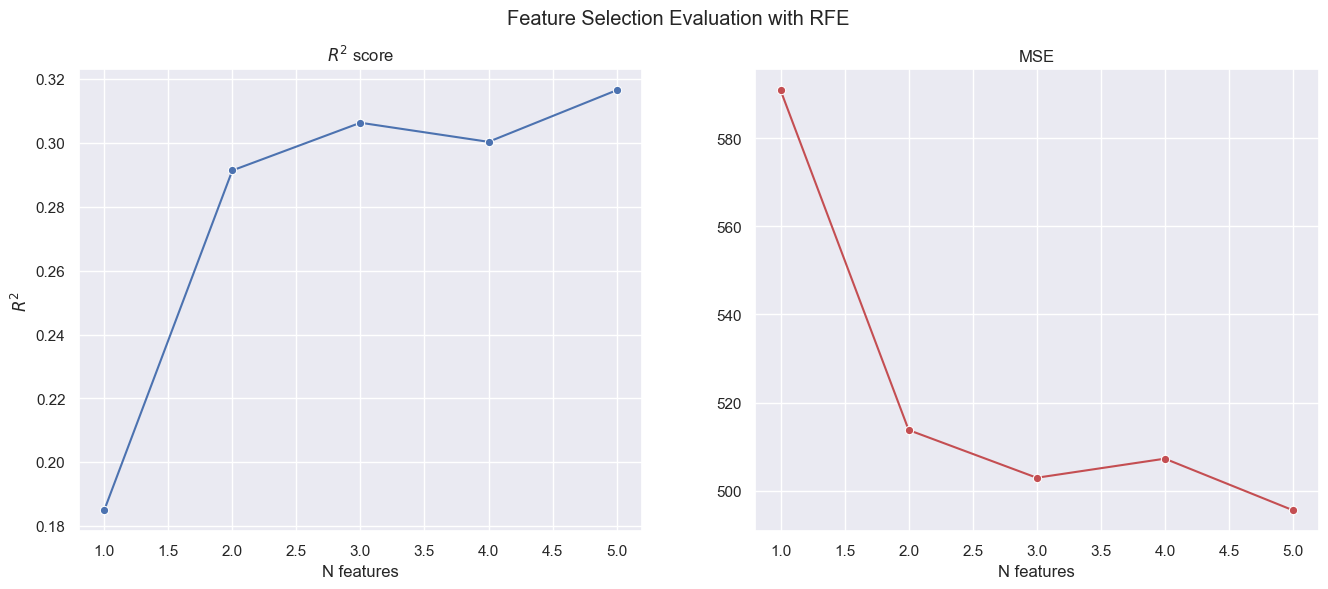

In [526]:
# find optimal number of input features
r2_scores = []
mse_scores = []
n_features = []
for i in range(1,6):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    selector = RFE(lm, n_features_to_select=i, step=1)
    selector.fit(X_train, y_train)
    test_predicted = selector.predict(X_test)
    n_features.append(i)
    r2_scores.append(r2_score(y_test, test_predicted))
    mse_scores.append(mean_squared_error(y_test, test_predicted))

line_fig = plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
# R square plot from RFE
sns.lineplot(x=n_features, y=r2_scores, marker='o')
plt.ylabel('$R^2$')
plt.xlabel('N features')
plt.title('$R^2$ score')

plt.subplot(1, 2, 2)
# MSE plot from RFE
sns.lineplot(x=n_features, y=mse_scores, marker='o', c='r')
plt.xlabel('N features')
plt.title('MSE')

line_fig.suptitle('Feature Selection Evaluation with RFE')


**Comment:** One thing we can observe is $R^2$ score peaks at 5 features, and also MSE is lowest at 5 features. Using this result, we can get the best 5 features to work with.

In [527]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# select 4 features to train our model
rfe = RFE(lm, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

# tuples of (feature name, whether selected, ranking)
print('List of selected input features:')
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

List of selected input features:


[('HP', True, 1),
 ('Attack', True, 1),
 ('Sp. Atk', True, 1),
 ('Sp. Def', True, 1),
 ('Speed', True, 1)]

In [528]:
# build and train another model with new input features
X_train = train[['HP', 'Attack','Sp. Atk','Sp. Def', 'Speed']]
X_test = test[['HP', 'Attack','Sp. Atk','Sp. Def', 'Speed']]

new_model = LinearRegression()
new_model.fit(X_train, y_train)

print('coef=', new_model.coef_, 'intercept=',
      new_model.intercept_)

coef= [-0.06331128  0.46855056 -0.09847572  0.59905661 -0.28603023] intercept= 25.211931117196542


### Evaluation

We will again evaluate our new model on train and test data

In [529]:
# Evaluate new model
print('Evaluate new model on train data')
score = evaluate_model(new_model, X_train, y_train)
score.insert(0,'5-LR-train')
evaluation_report.append(score)

print()
print('Evaluate new model on test data')
score = evaluate_model(new_model, X_test, y_test)
score.insert(0, '5-LR-test')
evaluation_report.append(score)

Evaluate new model on train data
Root MSE 24.061398433254155
MSE: 578.9508945638055
R Squared: 0.44874554418288315

Evaluate new model on test data
Root MSE 22.260884304607963
MSE: 495.54697002314117
R Squared: 0.3165080554433335


In [530]:
# create dataframe to store evaluation metrics
evaluation_df = pd.DataFrame(evaluation_report, columns=['model','MSE', 'R squared', 'RMSE'])
evaluation_df

,model,MSE,R squared,RMSE
0,1-LR-train,762.199553,0.274263,27.607962
1,1-LR-test,590.918916,0.184965,24.308824
2,5-LR-train,578.950895,0.448746,24.061398
3,5-LR-test,495.546970,0.316508,22.260884


We have 4 cases here:
- 1 feature model with train data
- 1 feature model with test data
- 5 features model with train data
- 5 features model with test data

Text(0.5, 1.0, 'MSE comparision for 2 models')

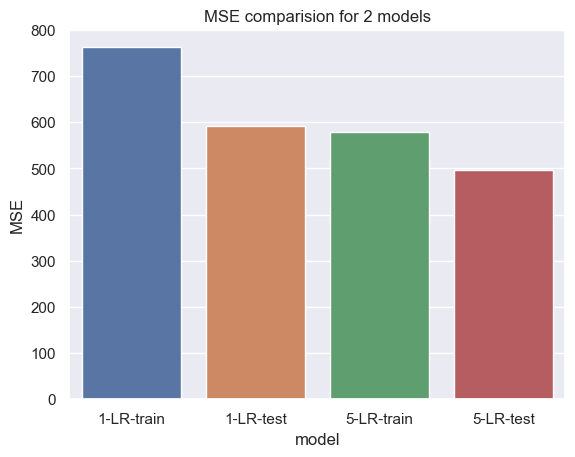

In [531]:
mse_plot = sns.barplot(data=evaluation_df, x='model', y='MSE')
# mse_plot.set_yscale("log")
mse_plot.set_title('MSE comparision for 2 models')

**Comment:** As can be seen, the performance of the model trained with 5 features is better, as our expectation, with lower MSE in prediction.

Text(0.5, 1.0, '$R^2$ comparision for 2 models')

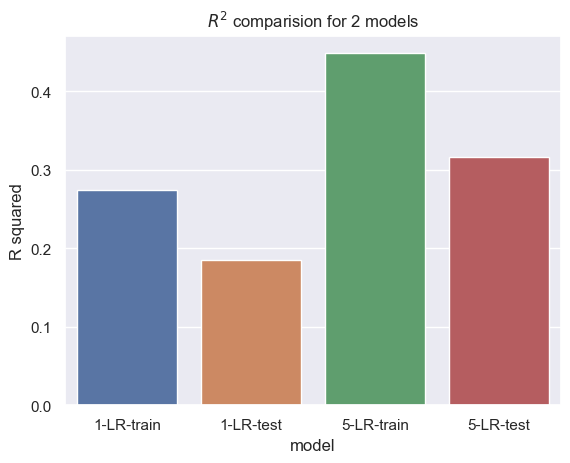

In [532]:
sns.barplot(data=evaluation_df, x='model', y='R squared').set_title('$R^2$ comparision for 2 models')

**Comment:** The $R^2$ score is also improved when the model trained with 5 features. This indicates that our model can better explain the variation in our data.

### Conclusion

In this section, we have trained and evaluate a model, using different combat stats as input, to predict the Defense stats of one Pokemon. We have seen that by increasing number of input features, we may have achieved better peformance in term of prediction.

However, we also need to keep in mind the problem of overfitting when considering increase the number of input features.

Finally, lets look at a graph of relation between actual and predicted Defense stats of our final model.

Text(0.5, 1.0, 'Relation between actual and predicted Defense by 5-LR model')

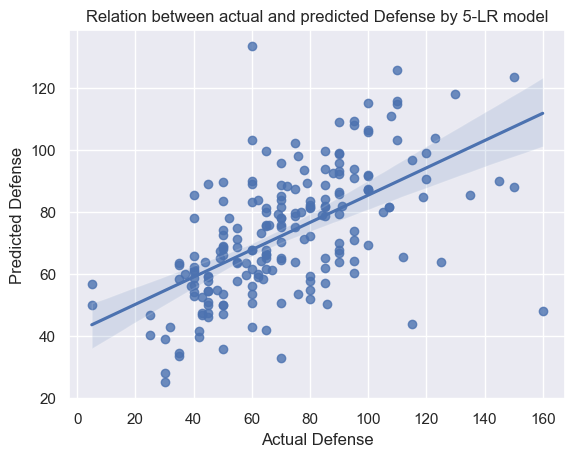

In [533]:
prediction = new_model.predict(X_test)
sns.regplot(x=y_test, y=prediction)
plt.ylabel('Predicted Defense')
plt.xlabel('Actual Defense')
plt.title('Relation between actual and predicted Defense by 5-LR model')

## Let's Find Legendary Pokemons

One other thing we might want to do is, given a Pokemon and its stats, can we predict if the it is a Legendary Pokemon. If you have ever played the Pokemon games, you would know that to encounter a Legendary Pokemon is really rare. So knowing if the Pokemon is a Legendary or not will give the player much advantage on their adventure.


In this section, we will try to build a model to check if Pokemon is a Legendary, given that pokemon stats. We will also compare the performance between different models and evaluate our result.

Text(0.5, 1.0, 'Scatter plot of Pokemon by their Attack and Defense')

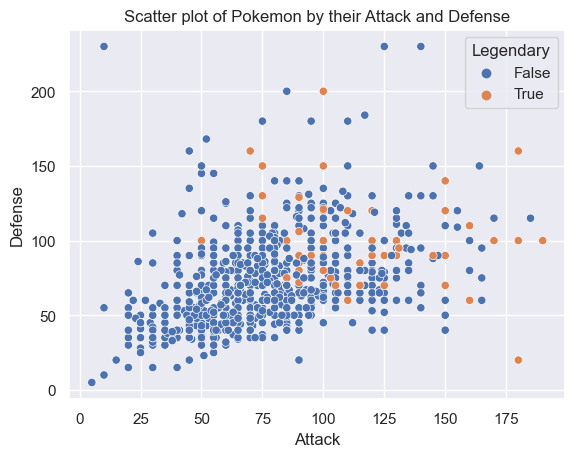

In [534]:
sns.scatterplot(data=pokemon, x='Attack', y='Defense', hue= 'Legendary')
plt.title('Scatter plot of Pokemon by their Attack and Defense')

### Training and Testing Data

In [535]:
input_features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# target feature now is legendary
target_feature = 'legendary'

X_train = train[input_features]
y_train = train[target_feature]
X_test = test[input_features]
y_test = test[target_feature]

print('Shape of training and testing set input:', X_train.shape, X_test.shape)
print('Shape of training and testing set target:', y_train.shape, y_test.shape)


Shape of training and testing set input: (600, 6) (200, 6)
Shape of training and testing set target: (600,) (200,)


### K-nearest Neigbors Classifier

In [536]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1, weights='distance')

# Train the model with the training data
clf_knn.fit(X_train, y_train)
print('class:', clf_knn.classes_, 'n_neighbors:', clf_knn.n_neighbors)


class: [0. 1.] n_neighbors: 1


#### Evaluation

In [537]:
print('Accuracy on training set', clf_knn.score(X_train, y_train))
print('Accuracy on test set', clf_knn.score(X_test, y_test))


Accuracy on training set 0.9966666666666667
Accuracy on test set 0.945


In [538]:
# classification report
print('Classification Report on test set')
test_predicted = clf_knn.predict(X_test)
print(classification_report(y_test, test_predicted, zero_division=0))


Classification Report on test set
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       180
         1.0       0.80      0.60      0.69        20

    accuracy                           0.94       200
   macro avg       0.88      0.79      0.83       200
weighted avg       0.94      0.94      0.94       200



**Comment:** While the accuracy on training set is really high, the accuracy on testing set is slightly lower. We could try to tune the **K** parameter to improve this performance.

#### Parameter Tuning with Cross Validation

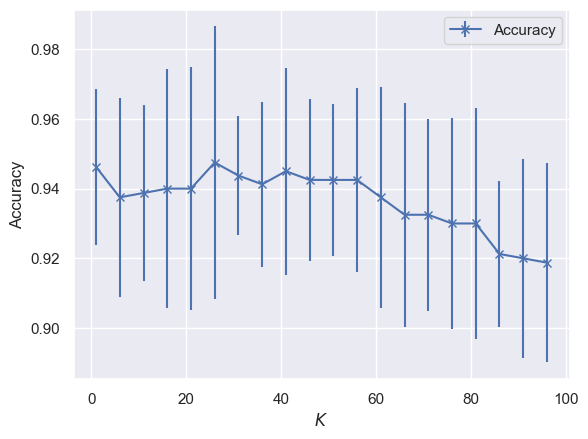

In [539]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# accuracy chart for different K values
cv_scores = []
cv_scores_std = []
k_range = range(1, 100, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, pokemon_num[input_features], pokemon_num[target_feature],
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std,
             marker='x', label='Accuracy')
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')


**Comment:** It can be seen that the accuracy first goes up when $K$ increases. It peeks around 30. Then, it keeps going down. Particularly, the performance (measured by the score mean) and its robustness/stableness (measured by the score std) drop around K=50. One possible reason is that when K is bigger than 50, the model suffers from the underfitting issue severely. 

We could use GridSearchCV to accomplish automatic K selection.

#### Parameter Tuning with GridSearchCV

In [540]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_neighbors': k_range}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy',
                   cv=KFold(n_splits=10, shuffle=True))
clf.fit(pokemon_num[input_features], pokemon_num[target_feature])

# Identify the best parameter(s)
best_k = clf.best_params_['n_neighbors']
print('Best K value: ', best_k)
print('The accuracy: ', clf.best_score_)


Best K value:  26
The accuracy:  0.94375


Let's build a model with best K value finds above to evaluate the model.

In [541]:
# Build a KNN classifier model
new_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# Train the model with the training data
new_knn.fit(X_train, y_train)
print('class:', clf_knn.classes_, 'n_neighbors:', clf_knn.n_neighbors)

class: [0. 1.] n_neighbors: 1


#### Evaluation

In [542]:
train_predicted = new_knn.predict(X_train)
test_predicted = new_knn.predict(X_test)

# Checking confusion matrix
print("Confusion matrix on train set: ")
train_matrix = confusion_matrix(y_train, train_predicted)
print(train_matrix)

Confusion matrix on train set: 
[[555   0]
 [  2  43]]


In [543]:
print("Confusion matrix on test set: ")
test_matrix = confusion_matrix(y_test, test_predicted)
print(test_matrix)

Confusion matrix on test set: 
[[180   0]
 [ 12   8]]


Text(0.5, 0.98, 'Confusion matrices Logistic Regresion model')

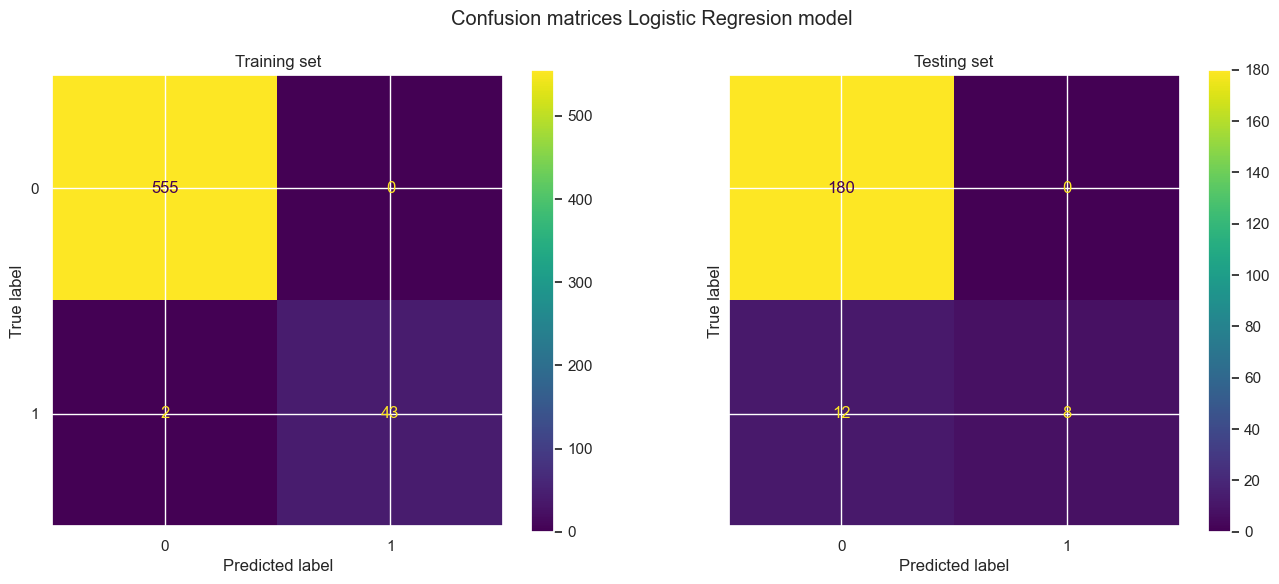

In [544]:
# confusion matrix chart
f, axes = plt.subplots(1, 2, figsize=(16, 6), sharey='row')

matrices = {
    "Training set": train_matrix,
    "Testing set": test_matrix
}

for i, (key, matrix) in enumerate(matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(key)

f.suptitle('Confusion matrices Logistic Regresion model')

In [545]:
# classification Report
print('Classification Report on test set')
test_predicted = new_knn.predict(X_test)
print(classification_report(y_test, test_predicted, zero_division=0))

Classification Report on test set
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       180
         1.0       1.00      0.40      0.57        20

    accuracy                           0.94       200
   macro avg       0.97      0.70      0.77       200
weighted avg       0.94      0.94      0.93       200



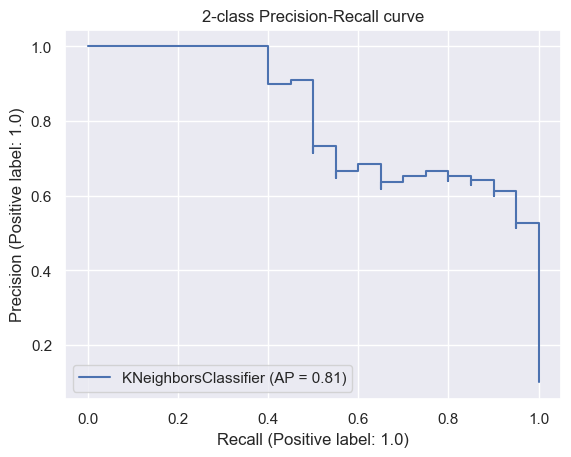

In [546]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    new_knn, X_test, y_test, name="KNeighborsClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

**Comment**:
- **Precision**: Out of all the Pokemon the model predict is Legendary, 100% of them actually are.
- **Recall**: Out of all the Pokemon that actually Legendary, the model only predicted correctly for 40% of those Pokemon.
- **F1 Score**: Since this value isn’t very close to 1, it tells us that the model does poor job of predicting whether or not a Pokemon is Legendary.

### Compare between different Classification Models

So far, we have built a KNN model to predict if one Pokemon is Legendary. Let's compare with some other classifier to see if there is a difference in performance between them.

Text(0.5, 1.0, 'Comparsion of Different Methods using Accuracy Metric')

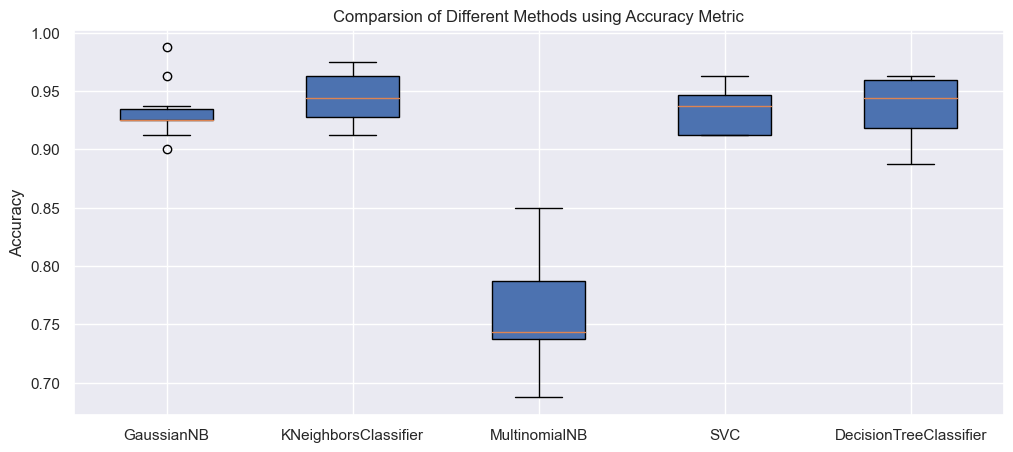

In [547]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


X = pokemon_num[input_features]
y = pokemon_num[target_feature]

plt.figure(figsize=(12, 5))
clf_gnb = GaussianNB()
gnb_scores = cross_val_score(clf_gnb, X, y,
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

# using K values we obtain above
clf_knn = KNeighborsClassifier(n_neighbors=best_k)
knn_scores = cross_val_score(clf_knn, X, y,
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

clf_mnb = MultinomialNB()
mnb_scores = cross_val_score(clf_mnb, X, y,
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

svc = SVC()
svc_scores = cross_val_score(svc, X, y,
                             scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X, y,
                            scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

plt.boxplot(x=[gnb_scores, knn_scores, mnb_scores, svc_scores, dt_scores], labels=['GaussianNB',
            'KNeighborsClassifier', 'MultinomialNB', 'SVC', 'DecisionTreeClassifier'], patch_artist=True)
plt.ylabel('Accuracy')
plt.title('Comparsion of Different Methods using Accuracy Metric')


### Conclusion

- In this final part, we have built and evaluate a KNN model to classify if a Pokemon is a Legendary one. The prediction are quite good in terms of accuracy, which might indicates that it can be helpful in an actual Pokemon adventure.
- Finally, we compare the our model with other classification model to get a better view of our performance.